ANALYSE DESCRIPTIVE - DATASET HEART DISEASE UCI

📥 Chargement des données depuis UCI Repository...
✅ Données chargées avec succès!
   - Nombre d'observations: 303
   - Nombre de variables: 14

📊 INFORMATIONS GÉNÉRALES

🔍 Structure du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11

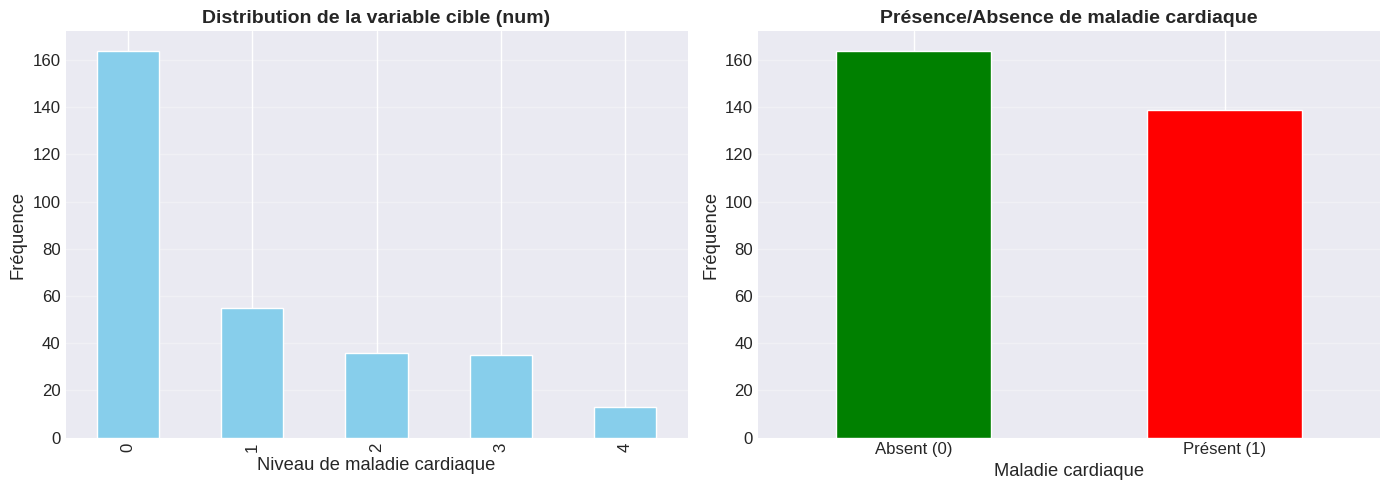

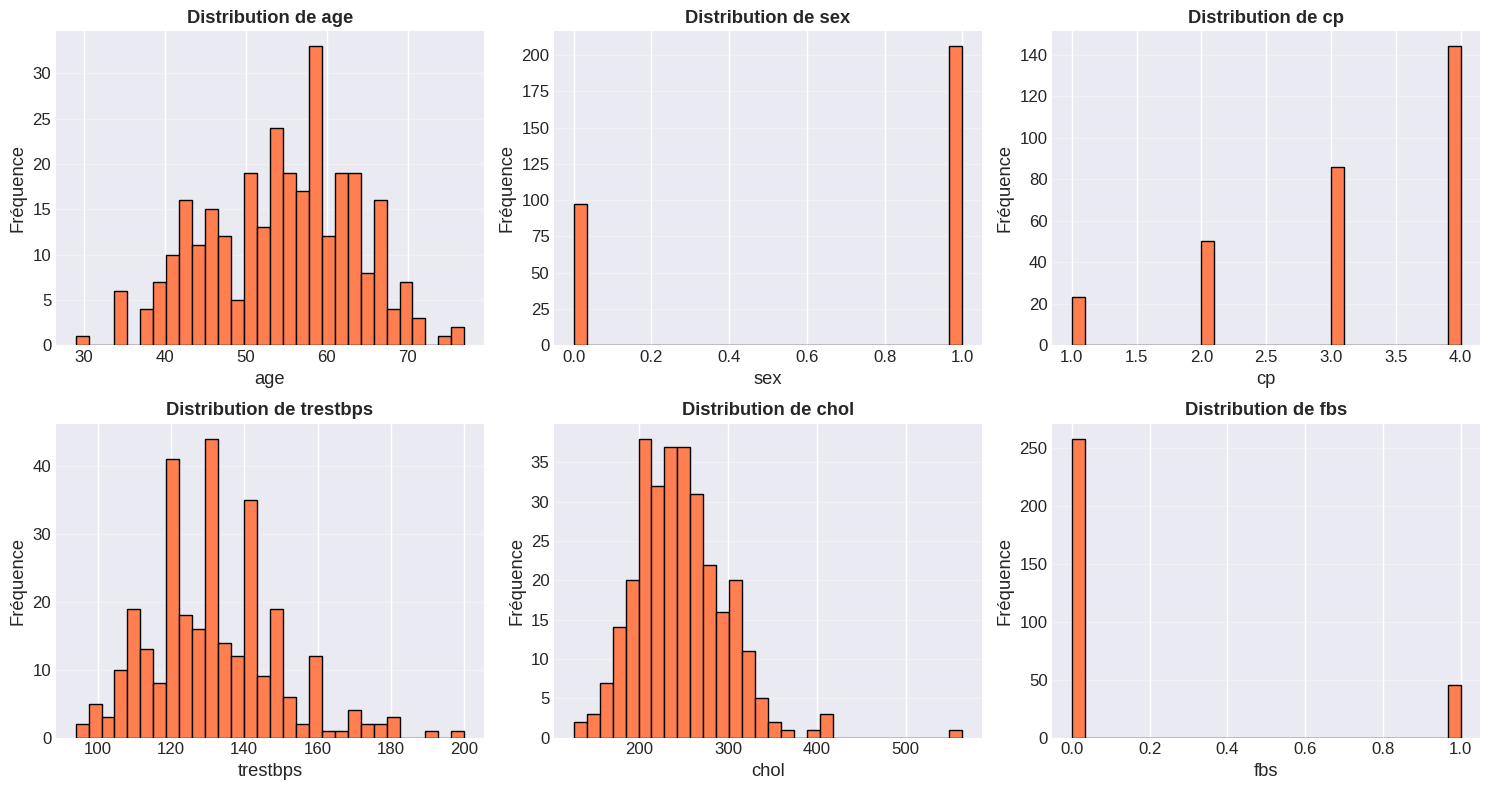

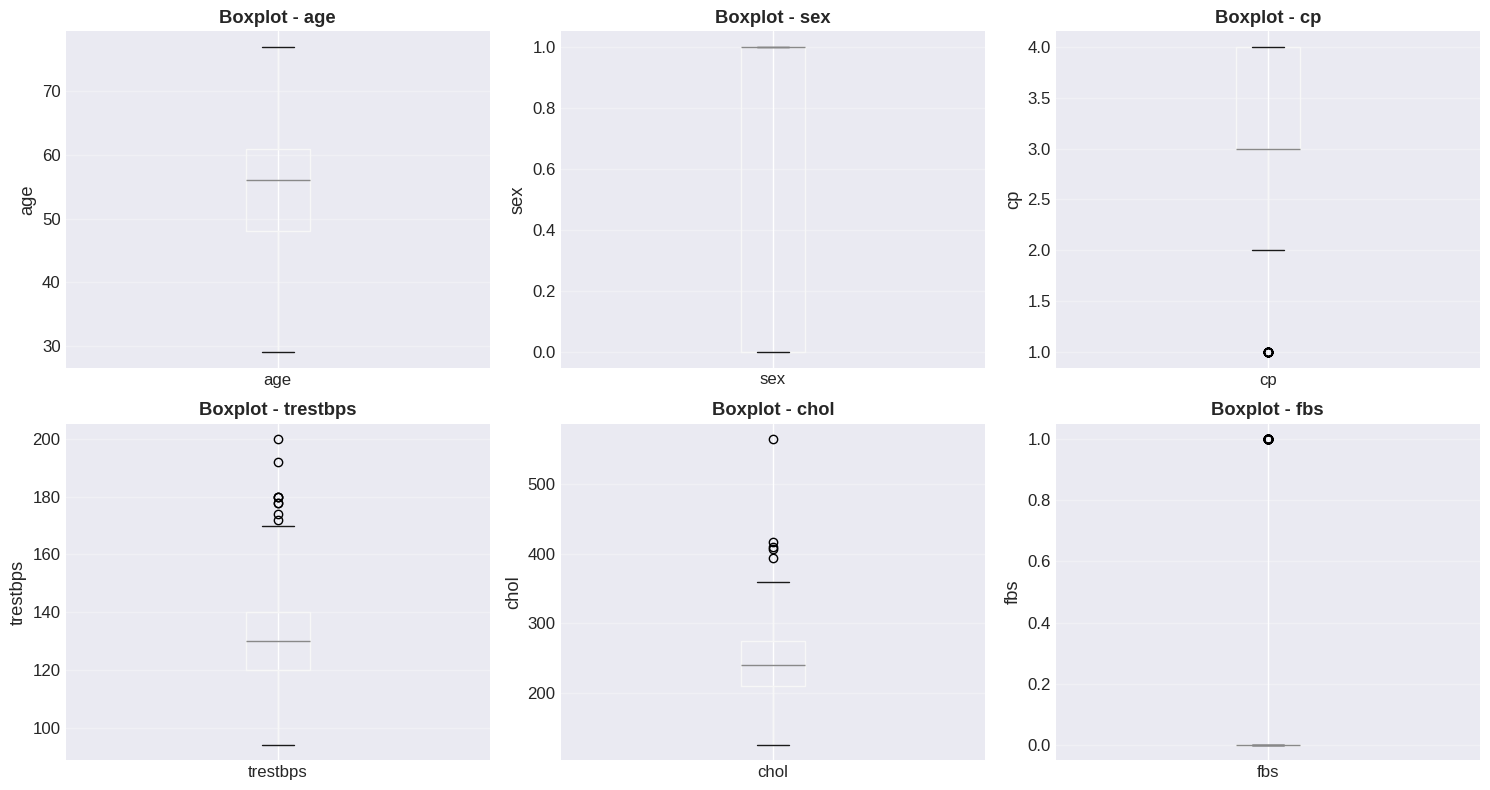

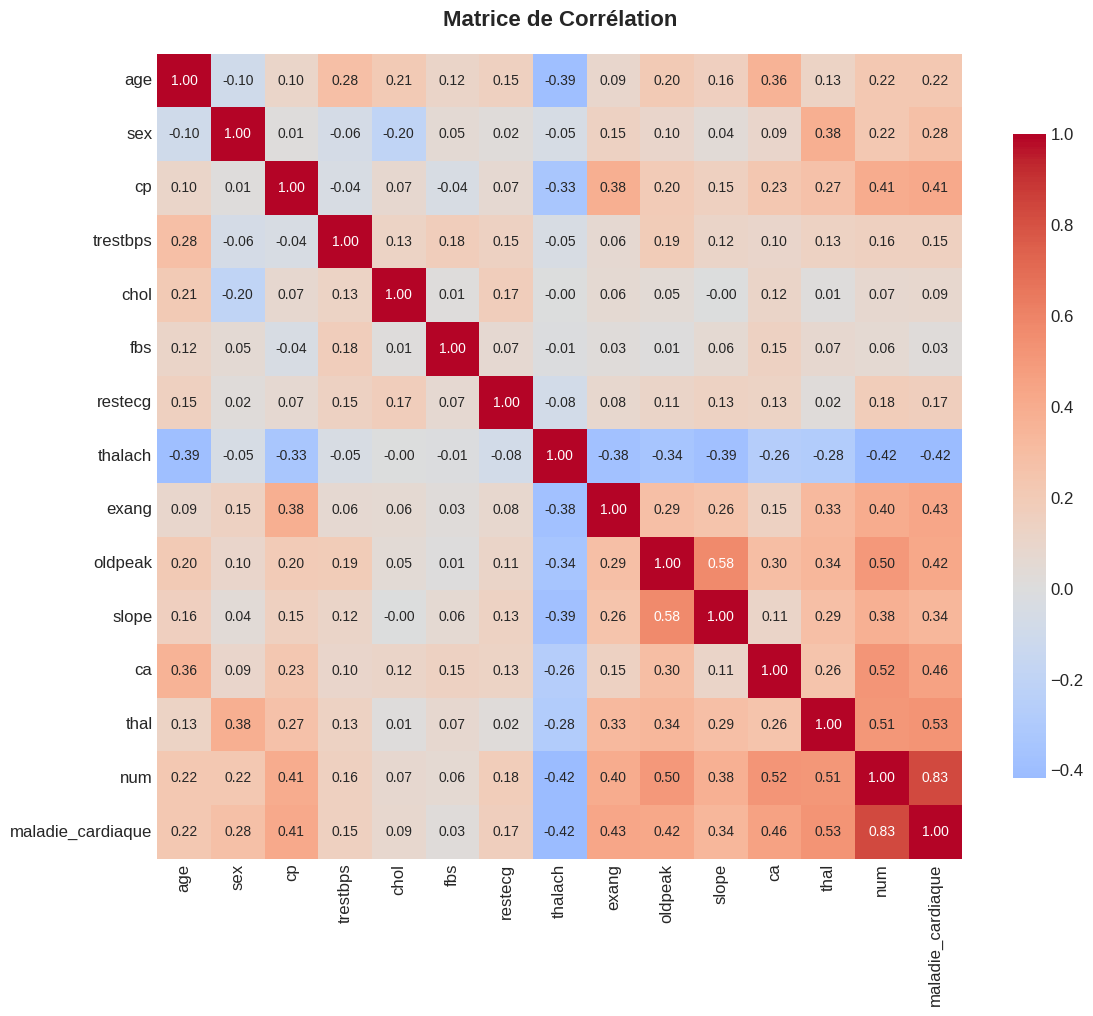

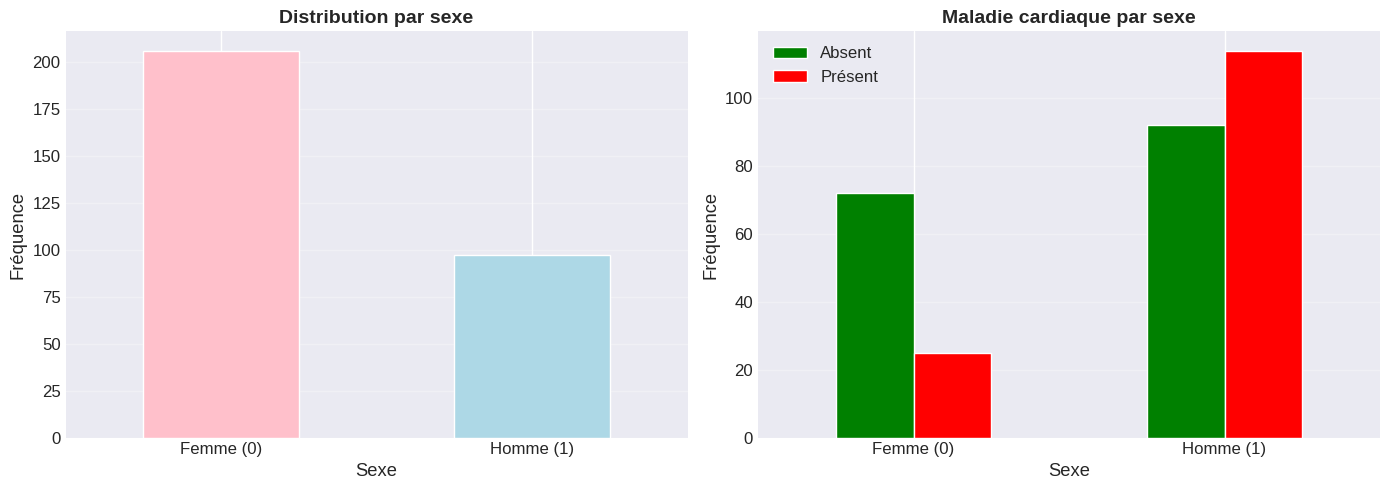

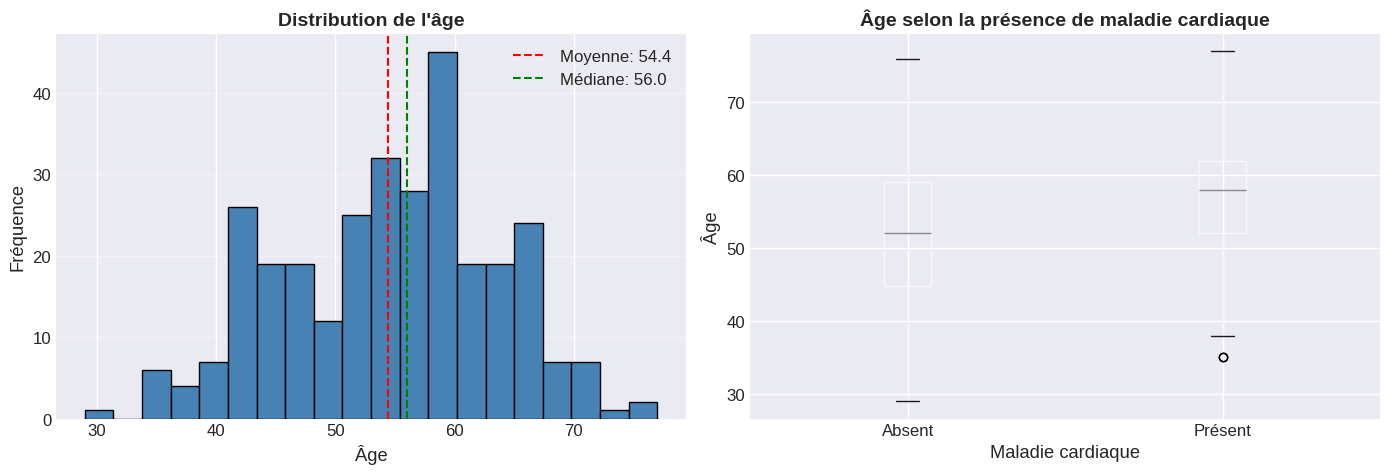


🔍 DÉTECTION DES OUTLIERS (Méthode IQR)
   Variable  Nb_Outliers Pourcentage  Min_Outlier  Max_Outlier
0        cp           23       7.59%          1.0          1.0
1  trestbps            9       2.97%        172.0        200.0
2      chol            5       1.65%        394.0        564.0
3       fbs           45      14.85%          1.0          1.0
4   thalach            1       0.33%         71.0         71.0
5   oldpeak            5       1.65%          4.2          6.2
6        ca           20       6.60%          3.0          3.0

📊 TESTS STATISTIQUES DE NORMALITÉ (Shapiro-Wilk)
   Variable  Statistique  P-value Normal
0       age       0.9865   0.0061    Non
1       sex       0.5876   0.0000    Non
2        cp       0.7908   0.0000    Non
3  trestbps       0.9665   0.0000    Non
4      chol       0.9473   0.0000    Non
5       fbs       0.4240   0.0000    Non
6   restecg       0.6448   0.0000    Non
7   thalach       0.9765   0.0001    Non
8     exang       0.5913   0.0000    

In [5]:
# =============================================================================
# ANALYSE DESCRIPTIVE DU DATASET HEART DISEASE UCI (10.24432/C52P4X)
# =============================================================================
# Dataset: Heart Disease (Cleveland Database)
# Source: UCI Machine Learning Repository
# DOI: 10.24432/C52P4X
# =============================================================================

# Installation des bibliothèques nécessaires
!pip install ucimlrepo seaborn matplotlib pandas numpy scipy -q

# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("ANALYSE DESCRIPTIVE - DATASET HEART DISEASE UCI")
print("="*80)

# =============================================================================
# 1. CHARGEMENT DES DONNÉES
# =============================================================================
print("\n📥 Chargement des données depuis UCI Repository...")

# Récupération du dataset (ID=45)
heart_disease = fetch_ucirepo(id=45)

# Extraction des features et target
X = heart_disease.data.features
y = heart_disease.data.targets

# Création du dataframe complet
df = pd.concat([X, y], axis=1)

print(f"✅ Données chargées avec succès!")
print(f"   - Nombre d'observations: {df.shape[0]}")
print(f"   - Nombre de variables: {df.shape[1]}")

# =============================================================================
# 2. INFORMATIONS SUR LE DATASET
# =============================================================================
print("\n" + "="*80)
print("📊 INFORMATIONS GÉNÉRALES")
print("="*80)

print("\n🔍 Structure du dataset:")
print(df.info())

print("\n📋 Aperçu des premières lignes:")
print(df.head(10))

print("\n📋 Aperçu des dernières lignes:")
print(df.tail(5))

# =============================================================================
# 3. DESCRIPTION DES VARIABLES
# =============================================================================
print("\n" + "="*80)
print("📝 DESCRIPTION DES VARIABLES")
print("="*80)

variable_descriptions = {
    'age': 'Âge du patient (années)',
    'sex': 'Sexe (1=homme, 0=femme)',
    'cp': 'Type de douleur thoracique (1-4)',
    'trestbps': 'Pression artérielle au repos (mm Hg)',
    'chol': 'Cholestérol sérique (mg/dl)',
    'fbs': 'Glycémie à jeun >120 mg/dl (1=vrai, 0=faux)',
    'restecg': 'Résultats ECG au repos (0-2)',
    'thalach': 'Fréquence cardiaque maximale atteinte',
    'exang': 'Angine induite par exercice (1=oui, 0=non)',
    'oldpeak': 'Dépression ST induite par exercice',
    'slope': 'Pente du segment ST (1-3)',
    'ca': 'Nombre de vaisseaux majeurs colorés (0-3)',
    'thal': 'Thalassémie (3=normal, 6=défaut fixe, 7=défaut réversible)',
    'num': 'Diagnostic (0=absence, 1-4=présence de maladie cardiaque)'
}

print("\n📌 Liste des variables:")
for var, desc in variable_descriptions.items():
    if var in df.columns:
        print(f"   • {var:12} : {desc}")

# =============================================================================
# 4. STATISTIQUES DESCRIPTIVES
# =============================================================================
print("\n" + "="*80)
print("📈 STATISTIQUES DESCRIPTIVES")
print("="*80)

print("\n🔢 Statistiques pour les variables numériques:")
print(df.describe().T.round(2))

print("\n🔢 Statistiques supplémentaires:")
stats_supp = pd.DataFrame({
    'Variance': df.var(),
    'Coefficient_Variation': (df.std() / df.mean() * 100),
    'Skewness': df.skew(),
    'Kurtosis': df.kurtosis()
}).round(3)
print(stats_supp)

# =============================================================================
# 5. ANALYSE DES VALEURS MANQUANTES
# =============================================================================
print("\n" + "="*80)
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*80)

missing_data = pd.DataFrame({
    'Valeurs_Manquantes': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_data[missing_data['Valeurs_Manquantes'] > 0])

if missing_data['Valeurs_Manquantes'].sum() == 0:
    print("\n✅ Aucune valeur manquante détectée!")
elif missing_data['Valeurs_Manquantes'].sum() > 0:
    print(f"\n⚠️ Total de valeurs manquantes: {missing_data['Valeurs_Manquantes'].sum()}")

# =============================================================================
# 6. ANALYSE DES DOUBLONS
# =============================================================================
print("\n" + "="*80)
print("🔍 ANALYSE DES DOUBLONS")
print("="*80)

duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicates}")
if duplicates > 0:
    print(f"⚠️ {duplicates} doublons détectés ({duplicates/len(df)*100:.2f}%) Kishan")
else:
    print("✅ Aucun doublon détecté!")

# =============================================================================
# 7. DISTRIBUTION DE LA VARIABLE CIBLE
# =============================================================================
print("\n" + "="*80)
print("🎯 ANALYSE DE LA VARIABLE CIBLE (num)")
print("="*80)

if 'num' in df.columns:
    target_dist = df['num'].value_counts().sort_index()
    print("\nDistribution de la variable cible:")
    print(target_dist)
    print(f"\nProportions:")
    print((target_dist / len(df) * 100).round(2))

    # Création de la variable binaire (présence/absence)
    df['maladie_cardiaque'] = (df['num'] > 0).astype(int)
    print(f"\n📊 Distribution binaire (0=absent, 1=présent):")
    print(df['maladie_cardiaque'].value_counts())
    print(f"\nProportions:")
    print((df['maladie_cardiaque'].value_counts() / len(df) * 100).round(2))

# =============================================================================
# 8. VISUALISATIONS
# =============================================================================
print("\n" + "="*80)
print("📊 GÉNÉRATION DES VISUALISATIONS")
print("="*80)

# Figure 1: Distribution de la variable cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

if 'num' in df.columns:
    # Distribution complète
    df['num'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Distribution de la variable cible (num)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Niveau de maladie cardiaque')
    axes[0].set_ylabel('Fréquence')
    axes[0].grid(axis='y', alpha=0.3)

    # Distribution binaire
    df['maladie_cardiaque'].value_counts().plot(kind='bar', ax=axes[1], color=['green', 'red'])
    axes[1].set_title('Présence/Absence de maladie cardiaque', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Maladie cardiaque')
    axes[1].set_ylabel('Fréquence')
    axes[1].set_xticklabels(['Absent (0)', 'Présent (1)'], rotation=0)
    axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Figure 2: Distribution des variables continues
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'num' in numeric_cols:
    numeric_cols.remove('num')
if 'maladie_cardiaque' in numeric_cols:
    numeric_cols.remove('maladie_cardiaque')

n_cols = min(len(numeric_cols), 6)
if n_cols > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols[:6]):
        df[col].hist(bins=30, ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'Distribution de {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(axis='y', alpha=0.3)

    # Masquer les axes inutilisés
    for idx in range(n_cols, 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Figure 3: Boxplots pour détecter les outliers
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols[:6]):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot - {col}', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)

    for idx in range(len(numeric_cols[:6]), 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Figure 4: Matrice de corrélation
fig, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=ax, cbar_kws={'shrink': 0.8})
ax.set_title('Matrice de Corrélation', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Figure 5: Distribution par sexe
if 'sex' in df.columns and 'maladie_cardiaque' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Distribution du sexe
    df['sex'].value_counts().plot(kind='bar', ax=axes[0], color=['pink', 'lightblue'])
    axes[0].set_title('Distribution par sexe', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Sexe')
    axes[0].set_ylabel('Fréquence')
    axes[0].set_xticklabels(['Femme (0)', 'Homme (1)'], rotation=0)
    axes[0].grid(axis='y', alpha=0.3)

    # Maladie par sexe
    pd.crosstab(df['sex'], df['maladie_cardiaque']).plot(kind='bar', ax=axes[1],
                                                          color=['green', 'red'])
    axes[1].set_title('Maladie cardiaque par sexe', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Sexe')
    axes[1].set_ylabel('Fréquence')
    axes[1].set_xticklabels(['Femme (0)', 'Homme (1)'], rotation=0)
    axes[1].legend(['Absent', 'Présent'])
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Figure 6: Distribution de l'âge
if 'age' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogramme de l'âge
    df['age'].hist(bins=20, ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title('Distribution de l\'âge', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Âge')
    axes[0].set_ylabel('Fréquence')
    axes[0].axvline(df['age'].mean(), color='red', linestyle='--',
                    label=f'Moyenne: {df["age"].mean():.1f}')
    axes[0].axvline(df['age'].median(), color='green', linestyle='--',
                    label=f'Médiane: {df["age"].median():.1f}')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Boxplot de l'âge par maladie cardiaque
    if 'maladie_cardiaque' in df.columns:
        df.boxplot(column='age', by='maladie_cardiaque', ax=axes[1])
        axes[1].set_title('Âge selon la présence de maladie cardiaque',
                         fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Maladie cardiaque')
        axes[1].set_ylabel('Âge')
        axes[1].set_xticklabels(['Absent', 'Présent'])
        plt.suptitle('')

    plt.tight_layout()
    plt.show()

# =============================================================================
# 9. ANALYSE DES OUTLIERS
# =============================================================================
print("\n" + "="*80)
print("🔍 DÉTECTION DES OUTLIERS (Méthode IQR)")
print("="*80)

outliers_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if len(outliers) > 0:
        outliers_summary.append({
            'Variable': col,
            'Nb_Outliers': len(outliers),
            'Pourcentage': f"{len(outliers)/len(df)*100:.2f}%",
            'Min_Outlier': outliers.min(),
            'Max_Outlier': outliers.max()
        })

if outliers_summary:
    outliers_df = pd.DataFrame(outliers_summary)
    print(outliers_df)
else:
    print("✅ Aucun outlier détecté avec la méthode IQR!")

# =============================================================================
# 10. TESTS STATISTIQUES
# =============================================================================
print("\n" + "="*80)
print("📊 TESTS STATISTIQUES DE NORMALITÉ (Shapiro-Wilk)")
print("="*80)

normality_tests = []
for col in numeric_cols[:10]:  # Limiter à 10 variables pour la clarté
    if len(df[col].dropna()) > 3:
        stat, p_value = stats.shapiro(df[col].dropna())
        normality_tests.append({
            'Variable': col,
            'Statistique': round(stat, 4),
            'P-value': round(p_value, 4),
            'Normal': 'Oui' if p_value > 0.05 else 'Non'
        })

if normality_tests:
    normality_df = pd.DataFrame(normality_tests)
    print(normality_df)
    print("\n💡 Interprétation: p-value > 0.05 suggère une distribution normale")

# =============================================================================
# 11. RÉSUMÉ FINAL
# =============================================================================
print("\n" + "="*80)
print("✅ RÉSUMÉ DE L'ANALYSE")
print("="*80)

print(f"""
📋 INFORMATIONS PRINCIPALES:
   • Dataset: Heart Disease UCI (DOI: 10.24432/C52P4X)
   • Nombre d'observations: {df.shape[0]}
   • Nombre de variables: {df.shape[1]}
   • Valeurs manquantes: {df.isnull().sum().sum()}
   • Doublons: {duplicates}

🎯 VARIABLE CIBLE:
   • Variable: num (ou maladie_cardiaque binaire)
   • Patients malades: {df['maladie_cardiaque'].sum() if 'maladie_cardiaque' in df.columns else 'N/A'}
   • Patients sains: {len(df) - df['maladie_cardiaque'].sum() if 'maladie_cardiaque' in df.columns else 'N/A'}

📊 CARACTÉRISTIQUES:
   • Âge moyen: {df['age'].mean():.1f} ans (± {df['age'].std():.1f})
   • % Hommes: {f"{(df['sex'].sum()/len(df)*100):.1f}%" if 'sex' in df.columns else 'N/A'}
   • Cholestérol moyen: {f"{(df['chol'].mean()):.1f} mg/dl (± {df['chol'].std():.1f})" if 'chol' in df.columns else 'N/A'}
""")

print("="*80)
print("🎉 ANALYSE DESCRIPTIVE TERMINÉE!")
print("="*80)

# =============================================================================
# 12. EXPORT DES RÉSULTATS (Optionnel)
# =============================================================================
print("\n💾 Pour sauvegarder les résultats, décommentez les lignes ci-dessous:")
print("""
# df.to_csv('heart_disease_cleaned.csv', index=False)
# correlation_matrix.to_csv('correlation_matrix.csv')
# stats_supp.to_csv('statistiques_descriptives.csv')
""")